In [1]:
from test import Test
from load_data import load_data
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
T = 10
N_ITERATIONS = 100.
DATA_SET = ['Bar Exam', 'Default on Credit'][0] # = 'Bar Exam'
bandits = load_data(DATA_SET)
e1 = [0.000001, 2., 10000.]
e2 = [0.000001, 2., 10000.]
delta = [0.000001, 0.5, 1.]
lam = [1]

In [3]:
TEST_THOMPSON = 1
TEST_SD_TS = 1
TEST_FAIR_SD_TS = 1

METHODS = TEST_THOMPSON*['Thompson Sampling'] + TEST_SD_TS*['Stochastic Dominance Thompson Sampling'] + \
          TEST_FAIR_SD_TS*['Fair Stochastic Dominance Thompson Sampling']
test_bounds = Test(bandits, METHODS, N_ITERATIONS, T, e1, e2, delta, lam)

test_bounds.add_test_case(bandits,'Stochastic Dominance Thompson Sampling', 2, 0, 0, lam)


In [4]:
test_bounds.print_result()


####################
Thompson Sampling
####################

Iterations:	100.0
T:		10
e1:		1e-06
e2:		1e-06
delta:	1e-06
Lambda: 0
Smooth Fair:	0.0
Not Smooth Fair:	100.0
=> Smooth Fair with Prob:	0.0
Needed Probability: 1-delta	= 0.999999
Cumulative Fairness Regret	7.98391975737
Regret	0.735452963331

####################
Stochastic Dominance Thompson Sampling
####################

Iterations:	100.0
T:		10
e1:		1e-06
e2:		1e-06
delta:	1e-06
Lambda: 1
Smooth Fair:	0.0
Not Smooth Fair:	100.0
=> Smooth Fair with Prob:	0.0
Needed Probability: 1-delta	= 0.999999
Cumulative Fairness Regret	2.34656715079
Regret	0.834278437424

####################
Stochastic Dominance Thompson Sampling
####################

Iterations:	100.0
T:		10
e1:		1e-06
e2:		1e-06
delta:	0.5
Lambda: 1
Smooth Fair:	0.0
Not Smooth Fair:	100.0
=> Smooth Fair with Prob:	0.0
Needed Probability: 1-delta	= 0.5
Cumulative Fairness Regret	2.37489190792
Regret	0.765439785009

####################
Stochastic Dominance Thompson S

thompson_sampling/stochastic_dominance.py:60: RuntimeWarning: invalid value encountered in divide
  return np.divide(self.average_smooth_fair, self.average_not_smooth_fair + self.average_smooth_fair)


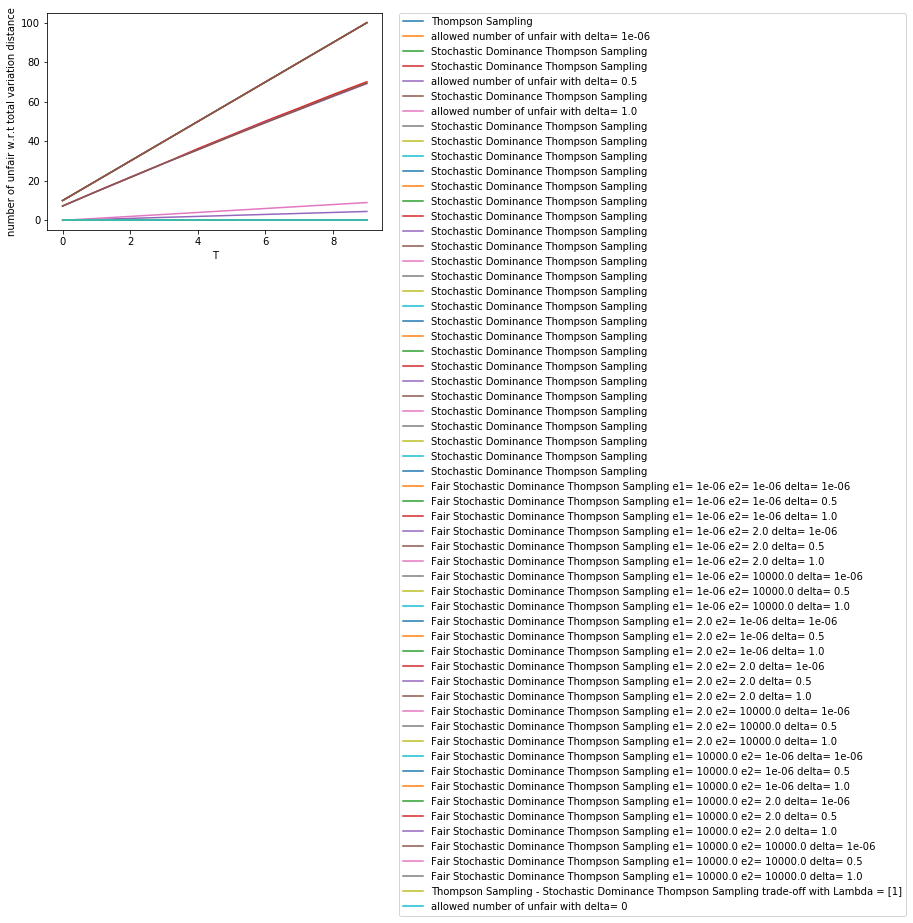

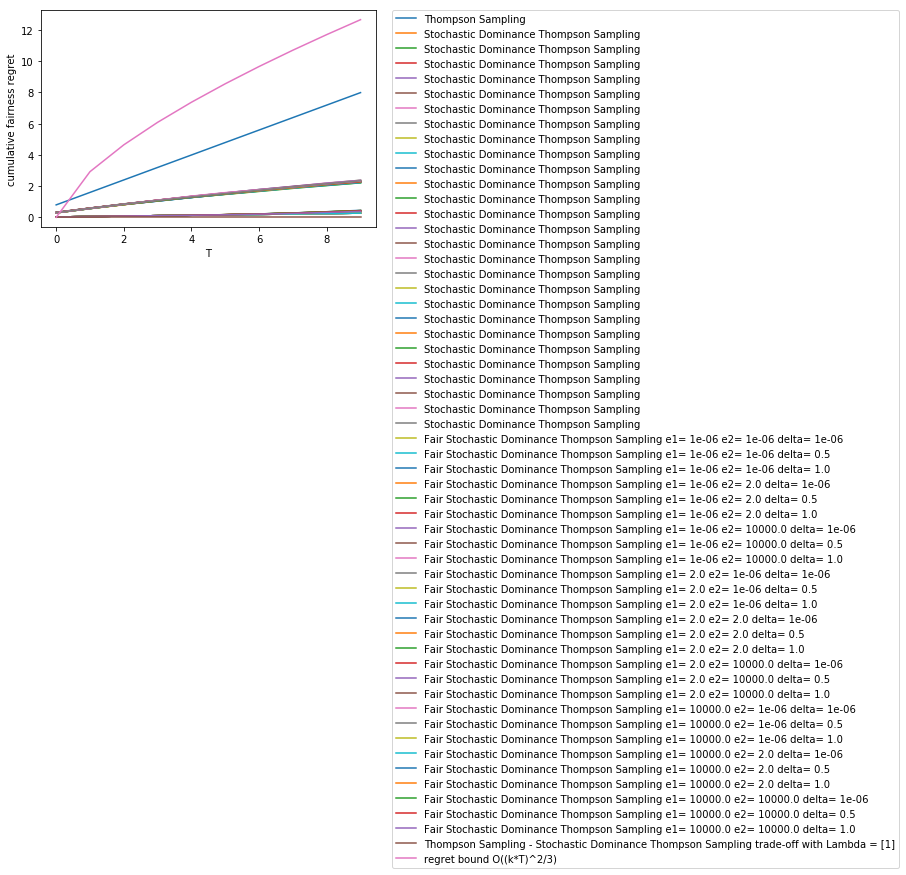

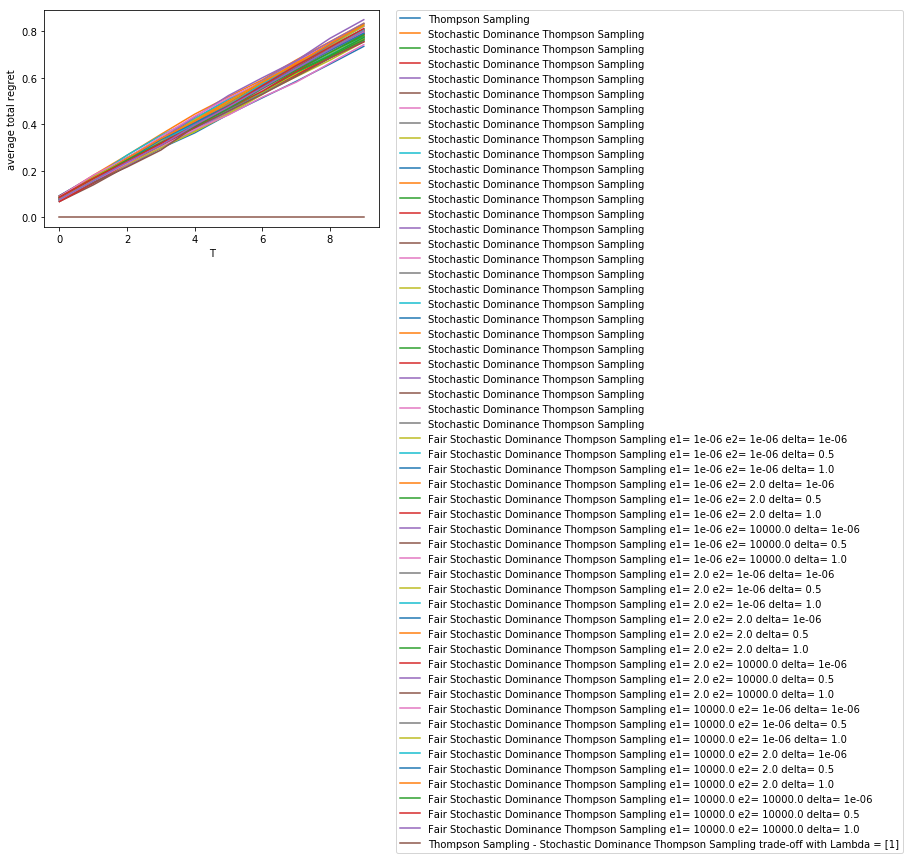

In [5]:
test_bounds.plot_smooth_fairness()
test_bounds.plot_fairness_regret()
test_bounds.plot_average_total_regret()